Import Data

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('C:/Users/yolau/OneDrive/Documents/TA/Kodingan/BBCA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,4180.0,4220.0,4170.0,4220.0,3802.38208,76474000
1,2017-12-19,4190.0,4250.0,4190.0,4220.0,3802.38208,76553500
2,2017-12-20,4210.0,4210.0,4175.0,4185.0,3770.84668,102963500
3,2017-12-21,4190.0,4230.0,4190.0,4220.0,3802.38208,61100000
4,2017-12-22,4235.0,4335.0,4195.0,4300.0,3874.46582,94573000


In [3]:
specific_df = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [4]:
specific_df

,Date,Close,Open,High,Low
0,2017-12-18,4220.0,4180.0,4220.0,4170.0
1,2017-12-19,4220.0,4190.0,4250.0,4190.0
2,2017-12-20,4185.0,4210.0,4210.0,4175.0
3,2017-12-21,4220.0,4190.0,4230.0,4190.0
4,2017-12-22,4300.0,4235.0,4335.0,4195.0
...,...,...,...,...,...
1489,2023-12-08,8750.0,8800.0,8850.0,8750.0
1490,2023-12-11,8750.0,8675.0,8775.0,8675.0
1491,2023-12-12,8700.0,8700.0,8750.0,8700.0
1492,2023-12-13,8675.0,8700.0,8750.0,8675.0


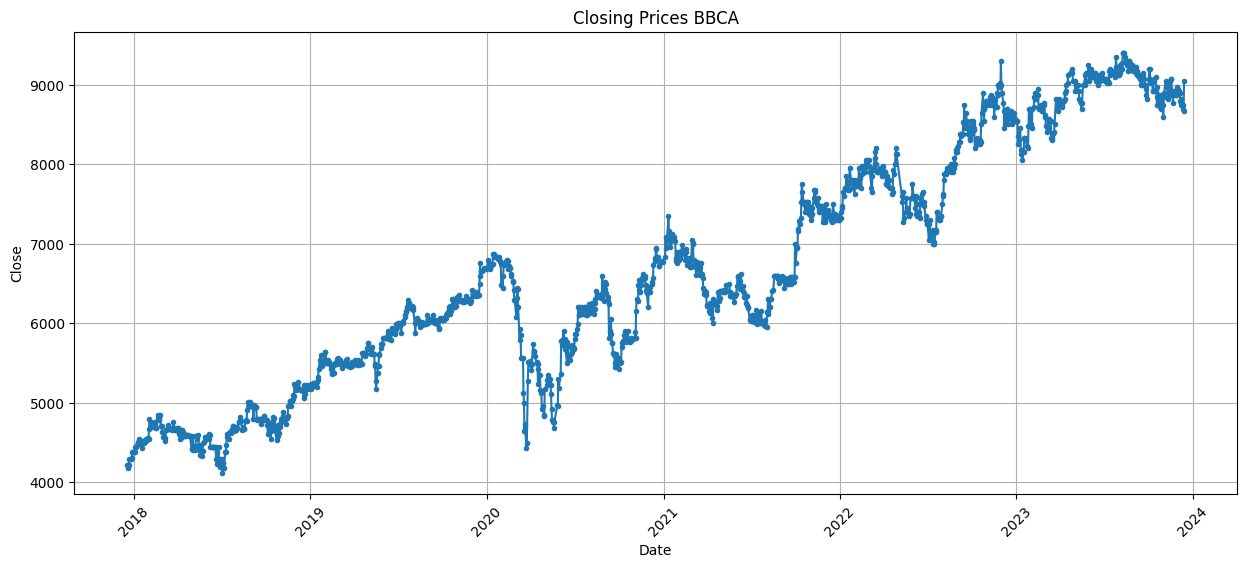

In [5]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], marker='.')
plt.title('Closing Prices BBCA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

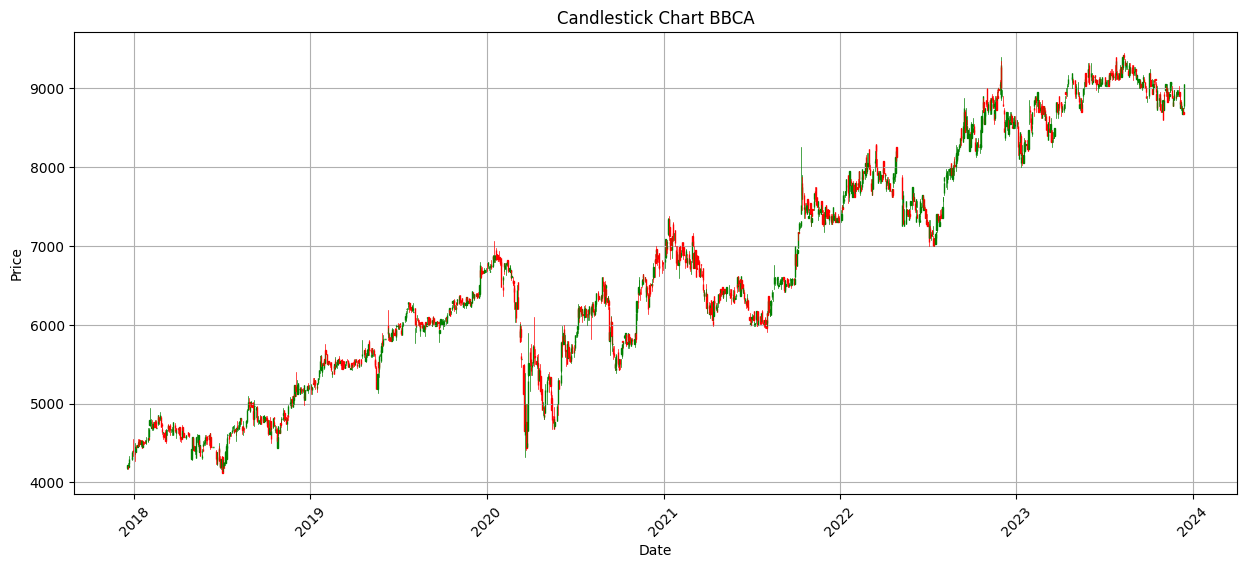

In [6]:
matplotlib_date = mdates.date2num(specific_df['Date'])

ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['High'], specific_df['Low'], specific_df['Close'])).T

plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart BBCA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

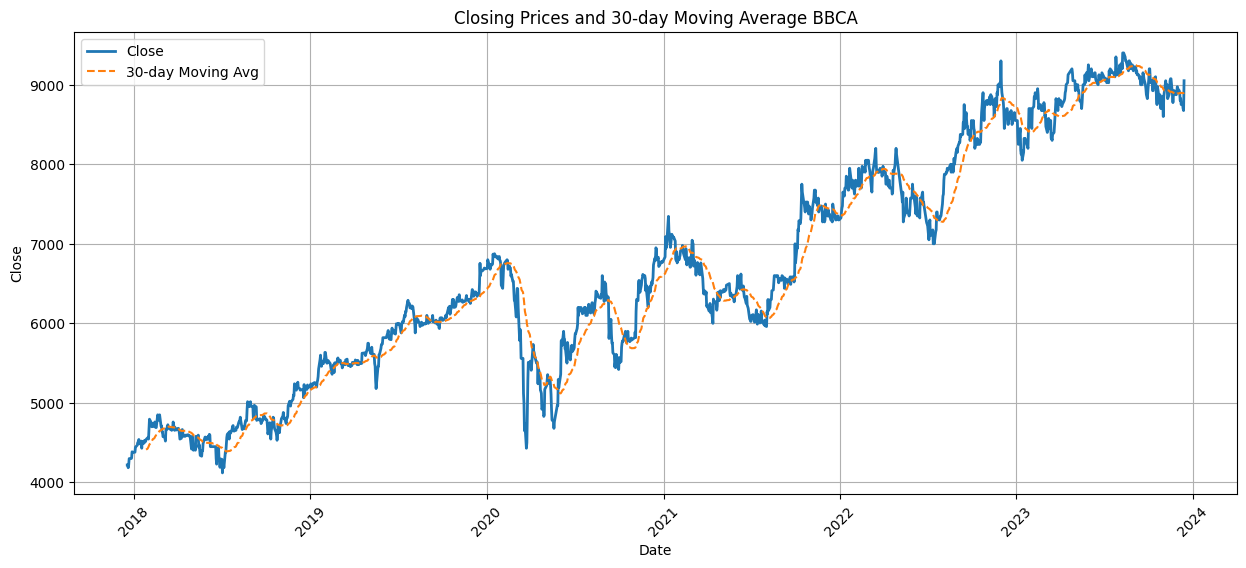

In [7]:
window = 30
plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], label='Close', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Close'].rolling(window=window).mean(),label=f'{window}-day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-day Moving Average BBCA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
specific_df.head()

,Date,Close,Open,High,Low
0,2017-12-18,4220.0,4180.0,4220.0,4170.0
1,2017-12-19,4220.0,4190.0,4250.0,4190.0
2,2017-12-20,4185.0,4210.0,4210.0,4175.0
3,2017-12-21,4220.0,4190.0,4230.0,4190.0
4,2017-12-22,4300.0,4235.0,4335.0,4195.0


In [9]:
new_df = specific_df.reset_index()['Close']

In [10]:
new_df

0       4220.0
1       4220.0
2       4185.0
3       4220.0
4       4300.0
         ...  
1489    8750.0
1490    8750.0
1491    8700.0
1492    8675.0
1493    9050.0
Name: Close, Length: 1494, dtype: float64

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

Partisi Data

In [12]:
train_size = int(len(scaled_data)*0.9) #90% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [13]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [14]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1284, 60)
(1284,)


Testing set size:-
(90, 60)
(90,)


(None, None)

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Layer= 3

dropout = 0.6

In [16]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.6))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=50))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [18]:
model.compile(loss='mean_squared_error',optimizer='adam')

epoch = 125

batchsize = 8

In [19]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=8,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125

161/161 [==============================] - 12s 39ms/step - loss: 0.0250 - val_loss: 0.0125
Epoch 2/125
161/161 [==============================] - 5s 30ms/step - loss: 0.0125 - val_loss: 0.0025
Epoch 3/125
161/161 [==============================] - 5s 32ms/step - loss: 0.0104 - val_loss: 5.8404e-04
Epoch 4/125
161/161 [==============================] - 5s 30ms/step - loss: 0.0092 - val_loss: 0.0019
Epoch 5/125
161/161 [==============================] - 5s 31ms/step - loss: 0.0085 - val_loss: 7.3415e-04
Epoch 6/125
161/161 [==============================] - 6s 37ms/step - loss: 0.0074 - val_loss: 7.0601e-04
Epoch 7/125
161/161 [==============================] - 5s 32ms/step - loss: 0.0066 - val_loss: 6.8820e-04
Epoch 8/125
161/161 [==============================] - 5s 31ms/step - loss: 0.0065 - val_loss: 0.0087
Epoch 9/125
161/161 [==============================] - 5s 31ms/step - loss: 0.0057 - val_loss: 0.0011
Epoch 10/125
161/161 [==============================] - 5s 30ms/

In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 8ms/step


In [21]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [22]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.03226403033590222
0.021783713491942414


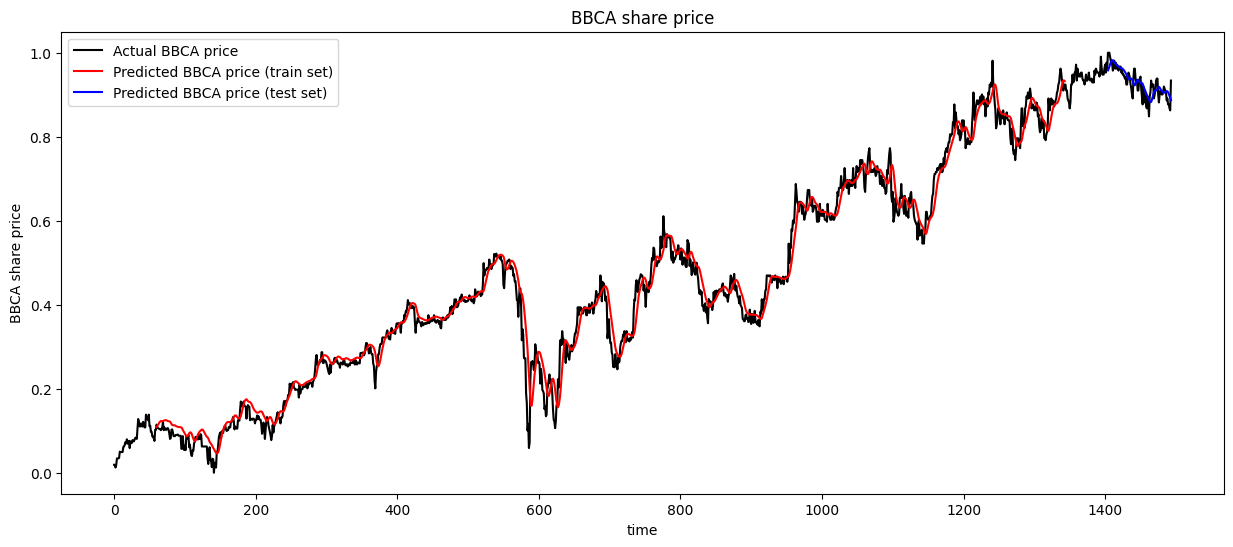

In [23]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [24]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 31ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8802.576171875
Day 2: Predicted Price = 8782.1748046875
Day 3: Predicted Price = 8771.1982421875
Day 4: Predicted Price = 8767.1376953125
Day 5: Predicted Price = 8767.119140625
Day 6: Predicted Price = 8768.9609375
Day 7: Predicted Price = 8771.345703125
Day 8: Predicted Price = 8773.62109375
Day 9: Predicted Price = 8775.552734375
Day 10: Predicted Price = 8777.1171875
Day 11: Predicted Price = 8778.37890625
Day 12: Predicted Price = 8779.41796875
Day 13: Predicted Price = 8780.302734375
Day 14: Predicted Price = 8781.0869140625
Day 15: Predicted Price = 8781.8056640625
Day 16: Predicted Price = 8782.4794921875
Day 17: Predicted Price = 8783.1240234375
Day 18: Predicted Price = 8783.7509765625
Day 19: Predicted Price = 8784.36328125
Day 20: Predicted Price = 8784.966796875
Day 21: Predicted Price = 8785.56640625
Day 22: Predicted Price = 8786.1611328125
Day 23: Predicted Pri

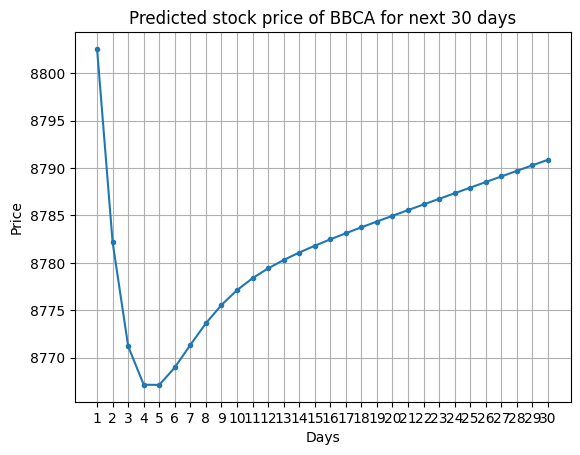

In [25]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [26]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.03226403033590222
Testing RMSE: 0.021783713491942414


batchsize = 16

In [27]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=16,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
81/81 [==============================] - 3s 40ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 2/125
81/81 [==============================] - 3s 43ms/step - loss: 0.0035 - val_loss: 0.0069
Epoch 3/125
81/81 [==============================] - 4s 44ms/step - loss: 0.0035 - val_loss: 8.4637e-04
Epoch 4/125
81/81 [==============================] - 4s 47ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 5/125
81/81 [==============================] - 4s 44ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 6/125
81/81 [==============================] - 4s 46ms/step - loss: 0.0036 - val_loss: 8.6724e-04
Epoch 7/125
81/81 [==============================] - 4s 48ms/step - loss: 0.0033 - val_loss: 4.5686e-04
Epoch 8/125
81/81 [==============================] - 4s 48ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 9/125
81/81 [==============================] - 4s 45ms/step - loss: 0.0038 - val_loss: 9.2335e-04
Epoch 10/125
81/81 [==============================] - 4s 47ms/step - loss: 0.0039 - 

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 20ms/step


In [29]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [30]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02774005634573841
0.021368500416519828


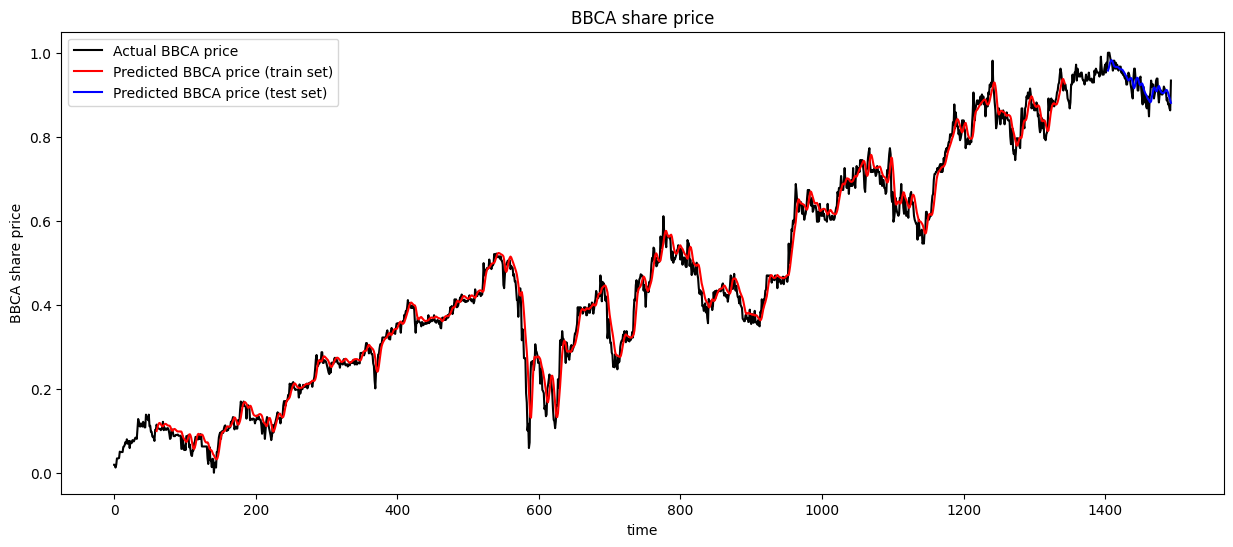

In [31]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [32]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 50ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8770.3720703125
Day 2: Predicted Price = 8756.4775390625
Day 3: Predicted Price = 8755.6162109375
Day 4: Predicted Price = 8762.12890625
Day 5: Predicted Price = 8771.0830078125
Day 6: Predicted Price = 8779.525390625
Day 7: Predicted Price = 8786.2470703125
Day 8: Predicted Price = 8791.1337890625
Day 9: Predicted Price = 8794.5732421875
Day 10: Predicted Price = 8797.0703125
Day 11: Predicted Price = 8799.052734375
Day 12: Predicted Price = 8800.814453125
Day 13: Predicted Price = 8802.5263671875
Day 14: Predicted Price = 8804.263671875
Day 15: Predicted Price = 8806.048828125
Day 16: Predicted Price = 8807.875
Day 17: Predicted Price = 8809.7275390625
Day 18: Predicted Price = 8811.5859375
Day 19: Predicted Price = 8813.439453125
Day 20: Predicted Price = 8815.2763671875
Day 21: Predicted Price = 8817.08984375
Day 22: Predicted Price = 8818.8779296875
Day 23: Predicted Pric

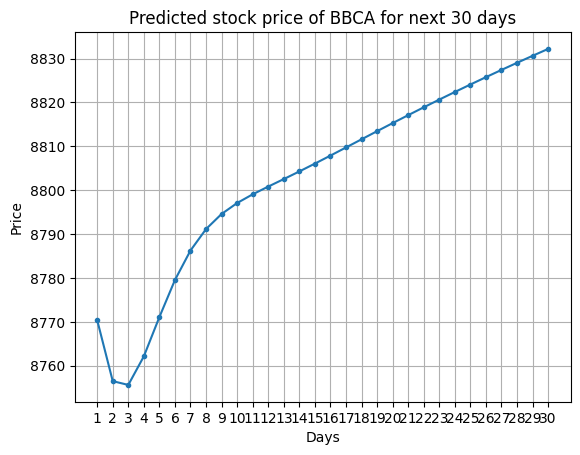

In [33]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [34]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02774005634573841
Testing RMSE: 0.021368500416519828


batchsize = 32

In [35]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
41/41 [==============================] - 3s 66ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 2/125
41/41 [==============================] - 3s 63ms/step - loss: 0.0033 - val_loss: 5.7473e-04
Epoch 3/125
41/41 [==============================] - 3s 63ms/step - loss: 0.0029 - val_loss: 5.0868e-04
Epoch 4/125
41/41 [==============================] - 2s 57ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 5/125
41/41 [==============================] - 2s 61ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 6/125
41/41 [==============================] - 2s 55ms/step - loss: 0.0031 - val_loss: 8.1922e-04
Epoch 7/125
41/41 [==============================] - 2s 53ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 8/125
41/41 [==============================] - 2s 55ms/step - loss: 0.0030 - val_loss: 6.4771e-04
Epoch 9/125
41/41 [==============================] - 2s 53ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 10/125
41/41 [==============================] - 2s 58ms/step - loss: 0.0034 - 

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 23ms/step


In [37]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [38]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02524351562449525
0.021257052702570528


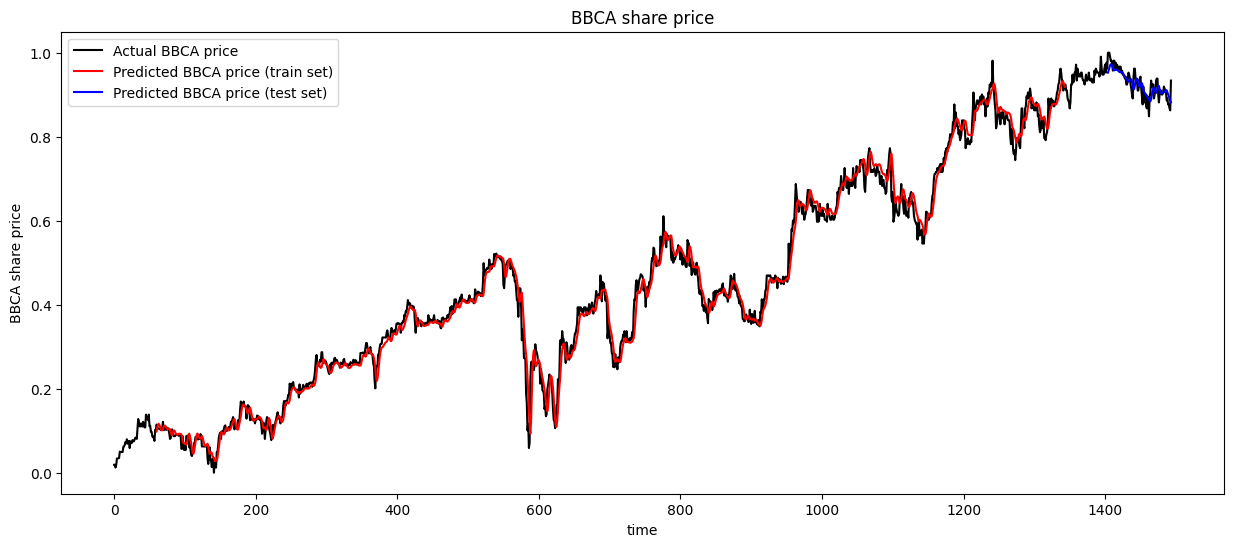

In [39]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [40]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 65ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8776.1337890625
Day 2: Predicted Price = 8772.5185546875
Day 3: Predicted Price = 8781.626953125
Day 4: Predicted Price = 8794.9541015625
Day 5: Predicted Price = 8807.3330078125
Day 6: Predicted Price = 8816.8466796875
Day 7: Predicted Price = 8823.4814453125
Day 8: Predicted Price = 8827.9580078125
Day 9: Predicted Price = 8831.0908203125
Day 10: Predicted Price = 8833.505859375
Day 11: Predicted Price = 8835.60546875
Day 12: Predicted Price = 8837.603515625
Day 13: Predicted Price = 8839.591796875
Day 14: Predicted Price = 8841.595703125
Day 15: Predicted Price = 8843.607421875
Day 16: Predicted Price = 8845.609375
Day 17: Predicted Price = 8847.5859375
Day 18: Predicted Price = 8849.5234375
Day 19: Predicted Price = 8851.4111328125
Day 20: Predicted Price = 8853.24609375
Day 21: Predicted Price = 8855.0224609375
Day 22: Predicted Price = 8856.7431640625
Day 23: Predicted P

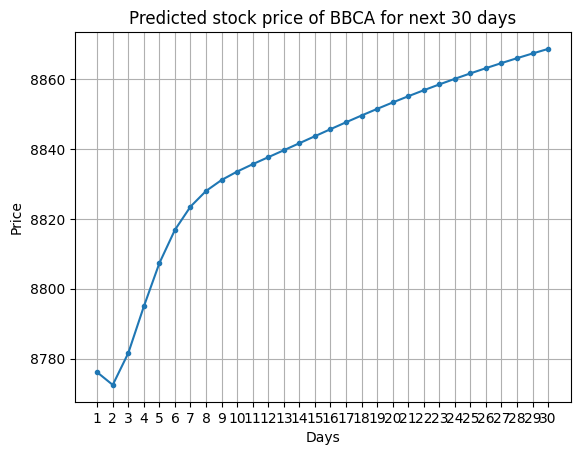

In [41]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [42]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02524351562449525
Testing RMSE: 0.021257052702570528


batchsize = 64

In [43]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=64,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
21/21 [==============================] - 3s 130ms/step - loss: 0.0030 - val_loss: 7.5394e-04
Epoch 2/125
21/21 [==============================] - 2s 98ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 3/125
21/21 [==============================] - 2s 94ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 4/125
21/21 [==============================] - 2s 110ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 5/125
21/21 [==============================] - 2s 110ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 6/125
21/21 [==============================] - 2s 110ms/step - loss: 0.0033 - val_loss: 9.1258e-04
Epoch 7/125
21/21 [==============================] - 2s 99ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 8/125
21/21 [==============================] - 2s 82ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 9/125
21/21 [==============================] - 2s 83ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 10/125
21/21 [==============================] - 2s 87ms/step - loss: 0.0029 - val_

In [44]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 16ms/step


In [45]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [46]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.027019078637289747
0.02176267019142342


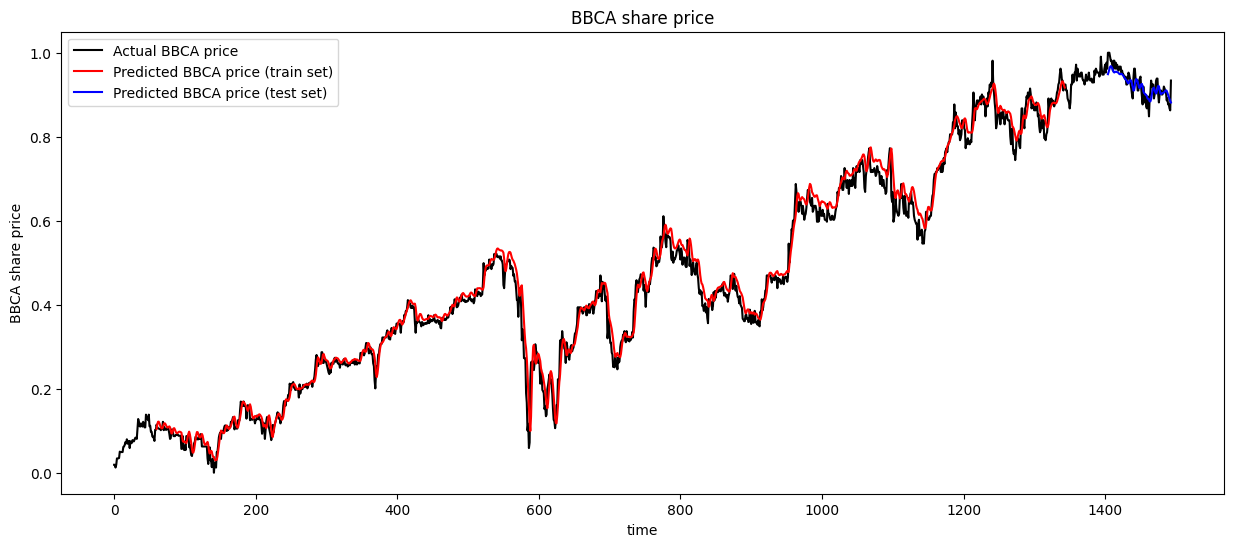

In [47]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [48]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 85ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8774.2529296875
Day 2: Predicted Price = 8773.310546875
Day 3: Predicted Price = 8784.87109375
Day 4: Predicted Price = 8799.7783203125
Day 5: Predicted Price = 8812.923828125
Day 6: Predicted Price = 8822.728515625
Day 7: Predicted Price = 8829.4794921875
Day 8: Predicted Price = 8834.078125
Day 9: Predicted Price = 8837.388671875
Day 10: Predicted Price = 8840.025390625
Day 11: Predicted Price = 8842.3486328125
Day 12: Predicted Price = 8844.53515625
Day 13: Predicted Price = 8846.654296875
Day 14: Predicted Price = 8848.720703125
Day 15: Predicted Price = 8850.73046875
Day 16: Predicted Price = 8852.673828125
Day 17: Predicted Price = 8854.54296875
Day 18: Predicted Price = 8856.33203125
Day 19: Predicted Price = 8858.0390625
Day 20: Predicted Price = 8859.6650390625
Day 21: Predicted Price = 8861.2109375
Day 22: Predicted Price = 8862.6787109375
Day 23: Predicted Price = 8

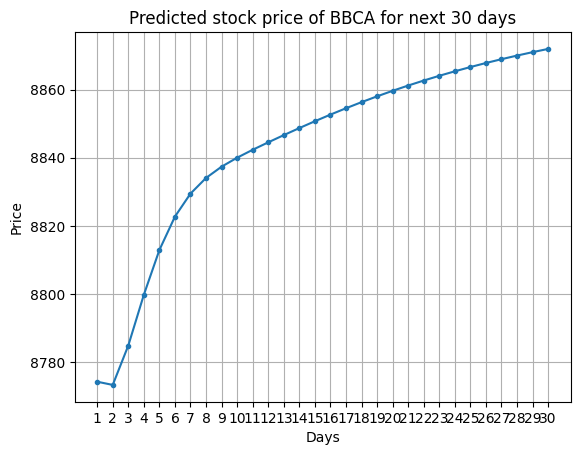

In [49]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [50]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.027019078637289747
Testing RMSE: 0.02176267019142342


batchsize = 128

In [51]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=128,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
11/11 [==============================] - 2s 146ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 2/125
11/11 [==============================] - 2s 148ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 3/125
11/11 [==============================] - 1s 134ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 4/125
11/11 [==============================] - 1s 135ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/125
11/11 [==============================] - 2s 160ms/step - loss: 0.0027 - val_loss: 5.3894e-04
Epoch 6/125
11/11 [==============================] - 1s 125ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 7/125
11/11 [==============================] - 1s 135ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 8/125
11/11 [==============================] - 1s 133ms/step - loss: 0.0028 - val_loss: 9.9004e-04
Epoch 9/125
11/11 [==============================] - 1s 125ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 10/125
11/11 [==============================] - 1s 124ms/step - loss: 0.0030 

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 19ms/step


In [53]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [54]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.03563206087424621
0.021225496691285504


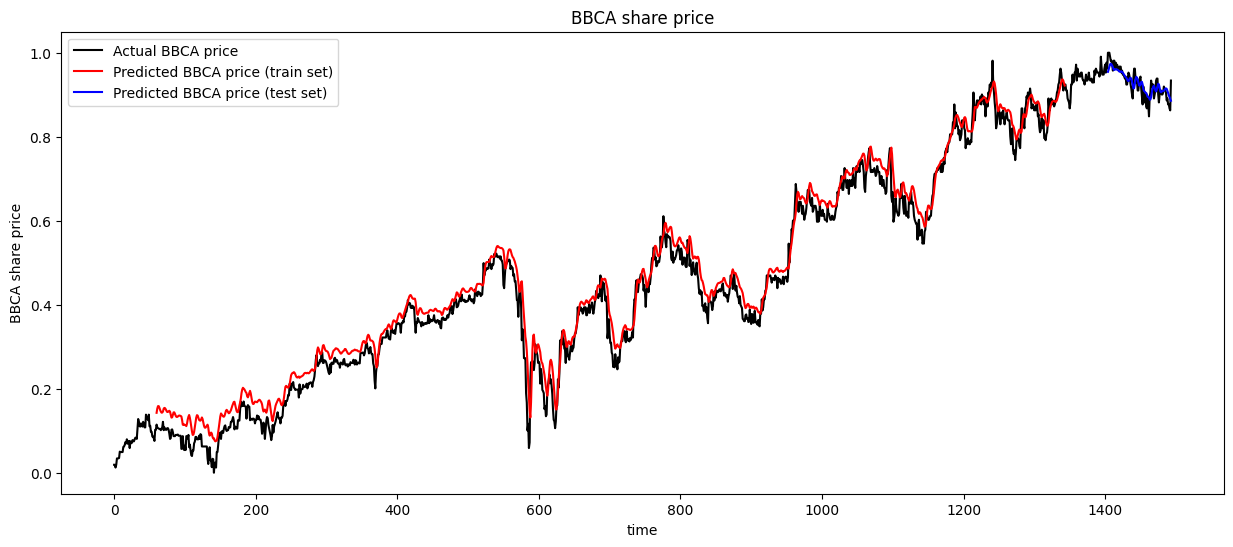

In [55]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [56]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 32ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8796.625
Day 2: Predicted Price = 8799.4140625
Day 3: Predicted Price = 8816.5439453125
Day 4: Predicted Price = 8837.048828125
Day 5: Predicted Price = 8855.22265625
Day 6: Predicted Price = 8869.46484375
Day 7: Predicted Price = 8880.1767578125
Day 8: Predicted Price = 8888.353515625
Day 9: Predicted Price = 8894.9130859375
Day 10: Predicted Price = 8900.5087890625
Day 11: Predicted Price = 8905.53125
Day 12: Predicted Price = 8910.197265625
Day 13: Predicted Price = 8914.6123046875
Day 14: Predicted Price = 8918.8291015625
Day 15: Predicted Price = 8922.8701171875
Day 16: Predicted Price = 8926.7451171875
Day 17: Predicted Price = 8930.4580078125
Day 18: Predicted Price = 8934.013671875
Day 19: Predicted Price = 8937.41015625
Day 20: Predicted Price = 8940.6533203125
Day 21: Predicted Price = 8943.744140625
Day 22: Predicted Price = 8946.6865234375
Day 23: Predicted Price =

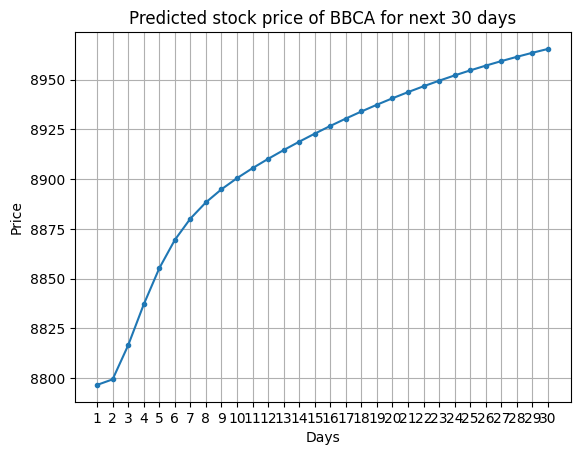

In [57]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [58]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.03563206087424621
Testing RMSE: 0.021225496691285504
